# Initializing Notebook

## Initializing Notebook

In [1]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn
# !pip install pickle5

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# import glob
# #print('glob: {}'.format(glob.__version__))
# import os

import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import pickle as pickle
print('pickle: {}'.format(pickle.format_version))

Python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
scipy: 1.14.0
numpy: 1.26.4
matplotlib: 3.9.1
pandas: 2.2.2
sklearn: 1.5.1
seaborn: 0.13.2
pickle: 4.0


In [3]:
# from google.colab import files
from pandas import read_csv
from pandas import read_json
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn import preprocessing
from re import sub
from pathlib import Path
from decimal import Decimal

In [4]:
#Main Dataset
df2 = pd.read_csv("full_raw_output.csv", encoding_errors="ignore")
df2.head()

,Unnamed: 0.1,Unnamed: 0,input_id,link,title,category,address,open_hours,popular_times,website,...,user_reviews,emails,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,geocoded_address_full
0,0,0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,...,"[{""Name"":""AR"",""ProfilePicture"":""https://lh3.go...",NaN,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000,Kafe dan Minuman,"Cahaya, 3A, Jalan Bintaro Sektor 3A, Bintaro J..."
1,1,1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,...,"[{""Name"":""bib"",""ProfilePicture"":""https://lh3.g...",NaN,R77 CARWASH & CAFE,15318,130,6458500,41,2248000,Otomotif,"Jalan Wana Kencana, Rawa Buntu, Ciater, Serpon..."
2,2,2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,...,"[{""Name"":""agustino widjaja"",""ProfilePicture"":""...",NaN,KWETIAU MEDAN ALEX,15325,37,930000,7,186000,Restoran Umum,"Sutera Gardenia 7, Alam Sutera, Pondok Jagung,..."
3,3,3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,...,"[{""Name"":""Asria Avicenna"",""ProfilePicture"":""ht...",NaN,GUARDIAN Living World 2,15325,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,"Living World Alam Sutera, Kav. 21, Jalan Alam ..."
4,4,4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,...,"[{""Name"":""Shiang Anugrah"",""ProfilePicture"":""ht...",NaN,ANUGRAH CELL CIPADU,15155,246,30210000,93,11741000,Peralatan dan Barang Elektronik,"Jalan Matahari, Sudimara Pinang, Pinang, Tange..."


In [5]:
df2.shape

(3932, 42)

In [6]:
#Location Dataset
df_loc = pd.read_csv("final_public_places.csv", encoding_errors="ignore")
df_loc.head()

,Unnamed: 0,Kelurahan,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,penduduk_beragama_kristen,penduduk_beragama_katholik,penduduk_beragama_hindu,penduduk_beragama_buddha,...,jumlah_Gas/SPBU_per_kelurahan,jumlah_Market_per_kelurahan,jumlah_Offices_per_kelurahan,jumlah_Residences_per_kelurahan,jumlah_Tourist_per_kelurahan,jumlah_Unclassified_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan
0,0,Cempaka Putih,26344,13006,13338,24932,781,464,67,93,...,2,0,2,3,0,0,0,1,0,0
1,1,Pondok Ranji,30640,15281,15359,28678,1251,624,59,28,...,4,0,0,4,0,0,1,1,2,1
2,2,Pisangan,36498,18058,18440,34212,1277,769,121,113,...,6,1,2,7,0,0,0,6,2,1
3,3,Cireundeu,26265,12896,13269,25075,684,347,11,48,...,3,1,0,5,0,0,0,2,1,2
4,4,Rempoa,26183,13035,13148,24491,1080,502,59,46,...,1,0,0,4,0,0,1,4,2,0


In [7]:
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'input_id', 'link', 'title', 'category',
       'address', 'open_hours', 'popular_times', 'website', 'phone',
       'plus_code', 'review_count', 'review_rating', 'reviews_per_rating',
       'latitude', 'longitude', 'cid', 'status', 'descriptions',
       'reviews_link', 'thumbnail', 'timezone', 'price_range', 'data_id',
       'images', 'reservations', 'order_online', 'menu', 'owner',
       'complete_address', 'about', 'user_reviews', 'emails', 'MerchantName',
       'TotalTransaction', 'PostalCode', 'TotalNominalTransaction',
       'Last1MonthTransaction', 'Last1MothNominal', 'processed_category',
       'geocoded_address_full'],
      dtype='object')

In [8]:
df2["geocoded_kelurahan"].value_counts()

KeyError: 'geocoded_kelurahan'

In [24]:
df2["geocoded_kelurahan_alternative"].value_counts()

geocoded_kelurahan_alternative
Rawa Buntu               170
Pamulang Barat           131
Serpong                  118
Pondok Jaya              102
Pondok Aren              101
Ciputat                   92
Pisangan                  77
Benda Baru                72
Pondok Pucung             71
Serua                     66
Cempaka Putih             66
Pakulonan                 65
Lengkong Gudang           62
Pondok Karya              60
Jombang                   59
Jurangmangu Timur         52
Pondok Cabe Ilir          51
Pondok Benda              48
Pakujaya                  47
Rengas                    45
Buaran                    45
Pondok Ranji              44
Kedaung                   44
Cireundeu                 44
Cipayung                  44
Rempoa                    41
Serua Indah               37
Pondok Jagung Timur       36
Setu                      35
Jelupang                  35
Jurangmangu Barat         33
Pondok Betung             32
Pakualam                  31
Ciater      

In [26]:
df2["geocoded_kelurahan_alternative"].isna().sum()

np.int64(989)

In [27]:
df2["geocoded_kelurahan"].isna().sum()

np.int64(989)

In [9]:
#Cleaning Data to drop Unwanted Indexes
df_loc = df_loc.drop("Unnamed: 0", axis=1) # df_loc[~df_loc["Unnamed: 0"]] 
df_loc

,Kelurahan,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,penduduk_beragama_kristen,penduduk_beragama_katholik,penduduk_beragama_hindu,penduduk_beragama_buddha,penduduk_beragama_konghucu,...,jumlah_Gas/SPBU_per_kelurahan,jumlah_Market_per_kelurahan,jumlah_Offices_per_kelurahan,jumlah_Residences_per_kelurahan,jumlah_Tourist_per_kelurahan,jumlah_Unclassified_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan
0,Cempaka Putih,26344,13006,13338,24932,781,464,67,93,7,...,2,0,2,3,0,0,0,1,0,0
1,Pondok Ranji,30640,15281,15359,28678,1251,624,59,28,0,...,4,0,0,4,0,0,1,1,2,1
2,Pisangan,36498,18058,18440,34212,1277,769,121,113,5,...,6,1,2,7,0,0,0,6,2,1
3,Cireundeu,26265,12896,13269,25075,684,347,11,48,0,...,3,1,0,5,0,0,0,2,1,2
4,Rempoa,26183,13035,13148,24491,1080,502,59,46,0,...,1,0,0,4,0,0,1,4,2,0
5,Rengas,24171,12060,12111,22379,975,686,85,46,0,...,4,0,0,1,0,0,0,0,6,1
6,Sawah Baru,30126,15019,15107,28232,1158,614,97,24,1,...,3,2,1,28,1,0,13,2,0,0
7,Serua,42254,21058,21196,37272,3394,1223,126,216,23,...,0,2,6,14,0,0,0,7,2,3
8,Ciputat,25148,12629,12519,23265,1982,580,21,182,18,...,13,4,1,9,0,0,1,6,12,6
9,Sawah,33152,16615,16537,31193,1198,678,26,56,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
grouped_places = feature_df.groupby(["geocoded_kelurahan"]).size().reset_index(name='count_UMKM')
grouped_places

,geocoded_kelurahan,count_UMKM
0,Babakan,30
1,Bakti Jaya,2
2,Bambu Apus,29
3,Benda Baru,75
4,Buaran,44
5,Cempaka Putih,65
6,Ciater,32
7,Cilenggang,19
8,Cipayung,47
9,Ciputat,30


In [54]:
df_loc = df_loc.replace("Rawabuntu","Rawa Buntu")
df_loc = df_loc.replace("Sawah","Sawah Lama")
df_loc = df_loc.replace("Perigi Baru","Parigi Baru")
df_loc = df_loc.replace("Parigi","Parigi Lama")
df_loc = df_loc.replace("Rawamekar Jaya","Rawa Mekar Jaya")
df_loc = df_loc.replace("Keranggan","Kranggan")

In [55]:
# df_loc["count_merchants"] = df_loc["Kelurahan"].apply(lambda x: grouped_places.loc[grouped_places["geocoded_kelurahan_alternative"] == x
df_loc_count_merchants = pd.merge(df_loc, grouped_places, left_on="Kelurahan", right_on="geocoded_kelurahan", how="left")

In [163]:
df_loc_count_merchants.shape

(54, 57)

In [58]:
df_loc_count_merchants[["Kelurahan","count_UMKM"]]

,Kelurahan,count_UMKM
0,Cempaka Putih,65
1,Pondok Ranji,43
2,Pisangan,82
3,Cireundeu,44
4,Rempoa,40
5,Rengas,48
6,Sawah Baru,30
7,Serua,69
8,Ciputat,30
9,Sawah Lama,67


In [59]:
df_loc_count_merchants.to_csv("final_kelurahan.csv")

# Feature Engineering

## Final Cleaning

In [36]:
kelurahan_tangsel = [
    "Cempaka Putih", "Pondok Ranji","Pisangan","Cireundeu", "Rempoa","Rengas", #Ciputat Timur
    "Sawah Baru", "Serua", "Ciputat", "Sawah", "Serua Indah", "Jombang", "Cipayung", "Sawah Lama", #Ciputat
    "Pondok Betung", "Pondok Pucung", "Pondok Karya", "Pondok Jaya", "Pondok Aren", "Pondok Kacang Barat", "Pondok Kacang Timur", "Parigi Lama", "Parigi Baru", "Jurangmangu Barat", "Jurangmangu Timur", #Pondok Aren
    "Pakulonan", "Pakualam", "Pakujaya", "Pondok Jagung", "Pondok Jagung Timur", "Jelupang", "Lengkong Karya", #Serpong Utara
    "Ciater", "Rawabuntu", "Rawa Buntu", "Rawa Mekar Jaya", "Lengkong Gudang", "Lengkong Wetan", "Buaran", "Lengkong Gudang Timur", "Cilenggang", "Serpong", #Serpong
    "Pamulang Barat", "Benda Baru", "Pondok Benda", "Pondok Cabe Udik", "Pondok Cabe Ilir","Kedaung", "Bambu Apus", "Pamulang Timur", #Pamulang
    "Muncul", "Setu", "Kranggan", "Kademangan", "Babakan", "Bakti Jaya" #Setu
]

In [37]:
def get_kelurahan_from_address(address):
  address_name = address #.raw["display_name"]
  address_tokens = [x.strip() for x in address_name.split(',')] # address.toString().split(",")
  for token in address_tokens:
    if token in kelurahan_tangsel:
      return token
    

# address_name = df2["geocoded_address"][0].raw["display_name"]
# print([x.strip() for x in address_name.split(',')])

df2["geocoded_kelurahan"] = df2["geocoded_address_full"].apply(lambda x: get_kelurahan_from_address(x))
df2["geocoded_kelurahan"]

0        Pondok Karya
1          Rawa Buntu
2       Pondok Jagung
3           Pakulonan
4                None
            ...      
3927      Parigi Lama
3928           Buaran
3929             None
3930             Setu
3931     Pondok Ranji
Name: geocoded_kelurahan, Length: 3932, dtype: object

In [38]:
# labels[labels["predefined_categories"].isin(["Retail", "Restoran Umum","Jasa", "Others"])]
feature_df = df2[~df2["processed_category"].isin(["Unclassified","Others"])]
feature_df

,Unnamed: 0.1,Unnamed: 0,input_id,link,title,category,address,open_hours,popular_times,website,...,emails,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,geocoded_address_full,geocoded_kelurahan
0,0,0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,...,NaN,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000,Kafe dan Minuman,"Cahaya, 3A, Jalan Bintaro Sektor 3A, Bintaro J...",Pondok Karya
1,1,1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,...,NaN,R77 CARWASH & CAFE,15318,130,6458500,41,2248000,Otomotif,"Jalan Wana Kencana, Rawa Buntu, Ciater, Serpon...",Rawa Buntu
2,2,2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,...,NaN,KWETIAU MEDAN ALEX,15325,37,930000,7,186000,Restoran Umum,"Sutera Gardenia 7, Alam Sutera, Pondok Jagung,...",Pondok Jagung
3,3,3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,...,NaN,GUARDIAN Living World 2,15325,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,"Living World Alam Sutera, Kav. 21, Jalan Alam ...",Pakulonan
4,4,4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,...,NaN,ANUGRAH CELL CIPADU,15155,246,30210000,93,11741000,Peralatan dan Barang Elektronik,"Jalan Matahari, Sudimara Pinang, Pinang, Tange...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,3927,3954,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,...,NaN,MITRA10 Bintaro Jaya,15228,1638,1086891979,403,270673633,Materials,"Mitra10, Jalan Boulevard Bintaro Jaya, Bintaro...",Parigi Lama
3928,3928,3955,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,...,NaN,Es Teh Manis Solo Defresh,15310,340,3465000,165,1816000,Kafe dan Minuman,"Jalan Buaran Raya, Buaran, Serpong, Tangerang ...",Buaran
3929,3929,3956,9ae5cdbb-1122-48c3-9e43-7939daf62956,NaN,Sinamon The Breeze,Coffee shop,"Bsd City, Jl. BSD Green Office Park, Sampora, ...","{""Friday"":[""7.30â€¯amâ€“10.00â€¯pm""],""Monday"":...",{},NaN,...,NaN,SINAMON THE BREEZE BSD,15345,140,13390500,30,2146000,Kafe dan Minuman,"Katsukita, L 11, Jalan Tol Serpong–Balaraja, B...",None
3930,3930,3957,1d610865-eaad-4d2a-baed-737de0547cf7,NaN,RM Pondok Mie,Noodle shop,"Jl. Permata Pamulang Blok A/6, RT.01/RW.3, Bak...","{""Friday"":[""10.00â€¯amâ€“9.30â€¯pm""],""Monday"":...","{""Friday"":{""10"":50,""11"":26,""12"":26,""13"":26,""14...",NaN,...,NaN,RM PONDOK MIE,15344,42,2687000,8,440000,Retail,"Bhakti Jaya, Setu, Tangerang Selatan, Jawa, 15...",Setu


In [60]:
feature_df["geocoded_kelurahan"].isna().sum()

1349

In [61]:
final_feature_df = feature_df[feature_df["geocoded_kelurahan"].notna()]
final_feature_df.shape

(2509, 43)

## Get Same Category Column

In [62]:
final_feature_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'input_id', 'link', 'title', 'category',
       'address', 'open_hours', 'popular_times', 'website', 'phone',
       'plus_code', 'review_count', 'review_rating', 'reviews_per_rating',
       'latitude', 'longitude', 'cid', 'status', 'descriptions',
       'reviews_link', 'thumbnail', 'timezone', 'price_range', 'data_id',
       'images', 'reservations', 'order_online', 'menu', 'owner',
       'complete_address', 'about', 'user_reviews', 'emails', 'MerchantName',
       'TotalTransaction', 'PostalCode', 'TotalNominalTransaction',
       'Last1MonthTransaction', 'Last1MothNominal', 'processed_category',
       'geocoded_address_full', 'geocoded_kelurahan'],
      dtype='object')

In [73]:
grouped_places = final_feature_df.groupby(["geocoded_kelurahan", "processed_category"]).size().reset_index(name='count')
grouped_places

,geocoded_kelurahan,processed_category,count
0,Babakan,Apotek dan Produk Kesehatan Lainnya,4
1,Babakan,Entertainment,1
2,Babakan,Kafe dan Minuman,3
3,Babakan,Peralatan dan Barang Elektronik,3
4,Babakan,Regional,4
...,...,...,...
484,Setu,Kebersihan,1
485,Setu,Regional,3
486,Setu,Restoran Umum,13
487,Setu,Retail,9


In [65]:
grouped_places.to_csv("Distribusi Merchant.csv")

In [84]:
print(grouped_places.loc[(grouped_places["geocoded_kelurahan"] == "Pondok Karya") & (grouped_places["processed_category"] == "Kafe dan Minuman")]["count"].values)

[5]


In [85]:
def count_kompetitor_in_kelurahan(row):
    print(row["geocoded_kelurahan"], row["processed_category"])
    value = grouped_places.loc[(grouped_places["geocoded_kelurahan"] == row["geocoded_kelurahan"]) & (grouped_places["processed_category"] == row["processed_category"])]["count"].values
    print(value)
    count = value[0]
    return count

In [86]:
final_feature_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'input_id', 'link', 'title', 'category',
       'address', 'open_hours', 'popular_times', 'website', 'phone',
       'plus_code', 'review_count', 'review_rating', 'reviews_per_rating',
       'latitude', 'longitude', 'cid', 'status', 'descriptions',
       'reviews_link', 'thumbnail', 'timezone', 'price_range', 'data_id',
       'images', 'reservations', 'order_online', 'menu', 'owner',
       'complete_address', 'about', 'user_reviews', 'emails', 'MerchantName',
       'TotalTransaction', 'PostalCode', 'TotalNominalTransaction',
       'Last1MonthTransaction', 'Last1MothNominal', 'processed_category',
       'geocoded_address_full', 'geocoded_kelurahan'],
      dtype='object')

In [88]:
final_feature_df["kompetitor_in_kelurahan"] = final_feature_df.apply(lambda x: count_kompetitor_in_kelurahan(x),axis=1)
final_feature_df["kompetitor_in_kelurahan"]

Pondok Karya Kafe dan Minuman
[5]
Rawa Buntu Otomotif
[2]
Pondok Jagung Restoran Umum
[10]
Pakulonan Apotek dan Produk Kesehatan Lainnya
[2]
Kedaung Restoran Umum
[25]
Pondok Benda Retail
[12]
Pakulonan Regional
[7]
Kedaung Printing
[1]
Serpong Retail
[21]
Rempoa Kafe dan Minuman
[6]
Pakualam Retail
[8]
Serpong Restoran Umum
[35]
Sawah Baru Peralatan dan Barang Elektronik
[2]
Ciputat Retail
[5]
Pondok Benda Restoran Umum
[19]
Lengkong Gudang Retail
[10]
Pondok Karya Restoran Umum
[25]
Cireundeu Retail
[9]
Setu Roti, Kue, dan Cemilan Lainnya
[3]
Pondok Cabe Ilir Peralatan dan Barang Elektronik
[1]
Ciputat Restoran Umum
[11]
Serua Kafe dan Minuman
[13]
Pondok Pucung Kafe dan Minuman
[16]
Jombang Retail
[12]
Rengas Restoran Umum
[23]
Pondok Karya Restoran Umum
[25]
Pamulang Barat Restoran Umum
[48]
Jurangmangu Timur Kosmetik
[2]
Serua Kafe dan Minuman
[13]
Pisangan Restoran Umum
[31]
Pondok Cabe Ilir Restoran Umum
[25]
Pakualam Restoran Umum
[15]
Pondok Aren Regional
[5]
Cipayung Restoran

C:\Users\pandu.prawira\AppData\Local\Temp\ipykernel_21112\3740653676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_feature_df["kompetitor_in_kelurahan"] = final_feature_df.apply(lambda x: count_kompetitor_in_kelurahan(x),axis=1)


0        5
1        2
2       10
3        2
5       25
        ..
3925     7
3927     1
3928     8
3930     9
3931     3
Name: kompetitor_in_kelurahan, Length: 2509, dtype: int64

In [89]:
final_feature_df.head()

,Unnamed: 0.1,Unnamed: 0,input_id,link,title,category,address,open_hours,popular_times,website,...,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,geocoded_address_full,geocoded_kelurahan,kompetitor_in_kelurahan
0,0,0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,...,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000,Kafe dan Minuman,"Cahaya, 3A, Jalan Bintaro Sektor 3A, Bintaro J...",Pondok Karya,5
1,1,1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,...,R77 CARWASH & CAFE,15318,130,6458500,41,2248000,Otomotif,"Jalan Wana Kencana, Rawa Buntu, Ciater, Serpon...",Rawa Buntu,2
2,2,2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,...,KWETIAU MEDAN ALEX,15325,37,930000,7,186000,Restoran Umum,"Sutera Gardenia 7, Alam Sutera, Pondok Jagung,...",Pondok Jagung,10
3,3,3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,...,GUARDIAN Living World 2,15325,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,"Living World Alam Sutera, Kav. 21, Jalan Alam ...",Pakulonan,2
5,5,5,5fdf5f32-eadd-463e-9dd6-38317e2e6dc8,NaN,Warteg Kharisma Bahari,Soto ayam restaurant,"MPFR+Q7V Warteg Kharisma Bahari, Jl. Bampu Apu...","{""Friday"":[""6.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":42,""11"":52,""12"":68,""13"":68,""14...",NaN,...,Warteg Kharisma Bahari,15413,621,12818000,129,2630000,Restoran Umum,"Jalan Sasak Tinggi, Kedaung, Pamulang, Tangera...",Kedaung,25


In [90]:
final_feature_df.to_csv("final_merchants.csv")

## One Hot Encode Categories

# Data Merging

In [250]:
temp_df = pd.read_csv("final_merchants.csv")

In [252]:
categories_in_df = temp_df["processed_category"]
categories_in_df.head()

0                       Kafe dan Minuman
1                               Otomotif
2                          Restoran Umum
3    Apotek dan Produk Kesehatan Lainnya
4                          Restoran Umum
Name: processed_category, dtype: object

In [241]:
df_loc = pd.read_csv("final_kelurahan.csv")

In [242]:
df1 = pd.get_dummies(final_feature_df["processed_category"])
df1

,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,Optics,...,Peralatan dan Barang Elektronik,Photo,Printing,Properti,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",Transportation,Warung
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2505,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2506,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [178]:
final_feature_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'input_id', 'link',
       'title', 'category', 'address', 'open_hours', 'popular_times',
       'website', 'phone', 'plus_code', 'review_count', 'review_rating',
       'reviews_per_rating', 'latitude', 'longitude', 'cid', 'status',
       'descriptions', 'reviews_link', 'thumbnail', 'timezone', 'price_range',
       'data_id', 'images', 'reservations', 'order_online', 'menu', 'owner',
       'complete_address', 'about', 'user_reviews', 'emails', 'MerchantName',
       'TotalTransaction', 'PostalCode', 'TotalNominalTransaction',
       'Last1MonthTransaction', 'Last1MothNominal', 'processed_category',
       'geocoded_address_full', 'geocoded_kelurahan',
       'kompetitor_in_kelurahan'],
      dtype='object')

In [243]:
label_df = final_feature_df[["TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.000.000,4
1,15318,6458500,41,2248000,4.400.000,190
2,15325,930000,7,186000,4.900.000,7
3,15325,1213000,5,630500,4.100.000,33
4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.000.000,4
2505,15228,1086891979,403,270673633,4.400.000,343
2506,15310,3465000,165,1816000,5.000.000,1
2507,15344,2687000,8,440000,4.600.000,60


In [244]:
final_df = final_feature_df[['geocoded_kelurahan', 'kompetitor_in_kelurahan']]
final_df

,geocoded_kelurahan,kompetitor_in_kelurahan
0,Pondok Karya,5
1,Rawa Buntu,2
2,Pondok Jagung,10
3,Pakulonan,2
4,Kedaung,25
...,...,...
2504,Pondok Pucung,7
2505,Parigi Lama,1
2506,Buaran,8
2507,Setu,9


In [245]:
#Merge with One Hot Encodings
final_df = pd.concat([final_df,df1],axis=1)
final_df

,geocoded_kelurahan,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,Peralatan dan Barang Elektronik,Photo,Printing,Properti,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",Transportation,Warung
0,Pondok Karya,5,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Rawa Buntu,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Pondok Jagung,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Pakulonan,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kedaung,25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,Pondok Pucung,7,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2505,Parigi Lama,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2506,Buaran,8,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2507,Setu,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [246]:
df_loc_count_merchants.columns

Index(['Kelurahan', 'jumlah_penduduk_akhir_2023', 'penduduk_laki2',
       'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 

In [179]:
final_feature_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'input_id', 'link',
       'title', 'category', 'address', 'open_hours', 'popular_times',
       'website', 'phone', 'plus_code', 'review_count', 'review_rating',
       'reviews_per_rating', 'latitude', 'longitude', 'cid', 'status',
       'descriptions', 'reviews_link', 'thumbnail', 'timezone', 'price_range',
       'data_id', 'images', 'reservations', 'order_online', 'menu', 'owner',
       'complete_address', 'about', 'user_reviews', 'emails', 'MerchantName',
       'TotalTransaction', 'PostalCode', 'TotalNominalTransaction',
       'Last1MonthTransaction', 'Last1MothNominal', 'processed_category',
       'geocoded_address_full', 'geocoded_kelurahan',
       'kompetitor_in_kelurahan'],
      dtype='object')

In [187]:
df_loc_count_merchants.columns

Index(['Kelurahan', 'jumlah_penduduk_akhir_2023', 'penduduk_laki2',
       'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 

In [186]:
grouped_places = final_feature_df.groupby("geocoded_kelurahan")["Last1MothNominal"].sum().reset_index(name='sum_transaction_nominal_per_area')
grouped_places.head()

,geocoded_kelurahan,sum_transaction_nominal_per_area
0,Babakan,163133500
1,Bakti Jaya,40801580
2,Bambu Apus,26559441
3,Benda Baru,215614946
4,Buaran,421505251
5,Cempaka Putih,632688049
6,Ciater,113277533
7,Cilenggang,131023920
8,Cipayung,318090348
9,Ciputat,445498854


In [188]:
df_loc = pd.merge(df_loc_count_merchants, grouped_places, left_on="geocoded_kelurahan", right_on="geocoded_kelurahan", how="left")

In [211]:
df_loc["log_count_UMKM"] = np.log1p(df_loc["count_UMKM"])

In [330]:
df_loc.to_csv("final_kelurahan.csv")

In [329]:
df_loc.head()

,Unnamed: 0,Kelurahan,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,penduduk_beragama_kristen,penduduk_beragama_katholik,penduduk_beragama_hindu,penduduk_beragama_buddha,...,jumlah_Unclassified_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,geocoded_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,transaction_per_business
0,0,Cempaka Putih,26344,13006,13338,24932,781,464,67,93,...,0,0,1,0,0,Cempaka Putih,65,632688049,4.19,9733662.29
1,1,Pondok Ranji,30640,15281,15359,28678,1251,624,59,28,...,0,1,1,2,1,Pondok Ranji,43,253752810,3.78,5901228.14
2,2,Pisangan,36498,18058,18440,34212,1277,769,121,113,...,0,0,6,2,1,Pisangan,82,394816118,4.42,4814830.71
3,3,Cireundeu,26265,12896,13269,25075,684,347,11,48,...,0,0,2,1,2,Cireundeu,44,159091065,3.81,3615706.02
4,4,Rempoa,26183,13035,13148,24491,1080,502,59,46,...,0,1,4,2,0,Rempoa,40,407958612,3.71,10198965.30


In [328]:
df_loc['transaction_per_business'] = (
    df_loc['sum_transaction_nominal_per_area'].astype(float) / 
    df_loc['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
)

In [195]:
category_count_per_area = final_feature_df.groupby('geocoded_kelurahan')['processed_category'].value_counts().reset_index(name="merchant_category_per_kelurahan")

In [205]:
total_business_in_area = df_loc[df_loc['Kelurahan'] == "Cempaka Putih"]['count_UMKM']
print(total_business_in_area)

0    65
Name: count_UMKM, dtype: int64


In [209]:
def get_category_density(row):
    total_business_in_area = df_loc[df_loc['Kelurahan'] == row["geocoded_kelurahan"]]['count_UMKM']
    print(total_business_in_area)
    density = int(row["merchant_category_per_kelurahan"])/int(total_business_in_area)
    return density

category_count_per_area["category_density_in_area"] =  category_count_per_area.apply(lambda x: get_category_density(x),axis=1)

52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
52    30
Name: count_UMKM, dtype: int64
53    2
Name: count_UMKM, dtype: int64
53    2
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
46    29
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41    75
Name: count_UMKM, dtype: int64
41

In [232]:
category_count_per_area["competition_index"] = category_count_per_area["merchant_category_per_kelurahan"] * category_count_per_area["category_density_in_area"]

In [228]:
def get_population(row):
    populasi = df_loc[df_loc['Kelurahan'] == row["geocoded_kelurahan"]]['jumlah_penduduk_akhir_2023'].values
    # print(populasi)
    return int(populasi)

category_count_per_area["population"] = category_count_per_area.apply(lambda x: get_population(x),axis=1)

In [214]:
category_count_per_area = category_count_per_area.drop("category_density",axis=1)

In [233]:
category_count_per_area["density_x_population"] = category_count_per_area["population"] * category_count_per_area["category_density_in_area"]

In [234]:
category_count_per_area.head()

,geocoded_kelurahan,processed_category,merchant_category_per_kelurahan,category_density_in_area,competition_index,population,density_x_population
0,Babakan,Restoran Umum,11,0.37,4.03,12869,4718.63
1,Babakan,Apotek dan Produk Kesehatan Lainnya,4,0.13,0.53,12869,1715.87
2,Babakan,Regional,4,0.13,0.53,12869,1715.87
3,Babakan,Kafe dan Minuman,3,0.10,0.30,12869,1286.90
4,Babakan,Peralatan dan Barang Elektronik,3,0.10,0.30,12869,1286.90


In [331]:
df.to_csv("merchant_category_per_kelurahan.csv")

In [324]:
df = category_count_per_area

In [325]:
# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df

In [326]:
df = advanced_feature_engineering(df)

In [327]:
df.head()

,geocoded_kelurahan,processed_category,merchant_category_per_kelurahan,category_density_in_area,competition_index,population,density_x_population,density_x_population_squared,density_x_population_cubed,log_density_x_population,category_density_in_area_squared,category_density_in_area_cubed,log_category_density_in_area,competition_index_squared,competition_index_cubed,log_competition_index
0,Babakan,Restoran Umum,11,0.37,4.03,12869,4718.63,22265500.53,105062733005.18,8.46,0.13,0.05,0.31,16.27,65.61,1.62
1,Babakan,Apotek dan Produk Kesehatan Lainnya,4,0.13,0.53,12869,1715.87,2944198.42,5051851925.12,7.45,0.02,0.00,0.13,0.28,0.15,0.43
2,Babakan,Regional,4,0.13,0.53,12869,1715.87,2944198.42,5051851925.12,7.45,0.02,0.00,0.13,0.28,0.15,0.43
3,Babakan,Kafe dan Minuman,3,0.10,0.30,12869,1286.90,1656111.61,2131250030.91,7.16,0.01,0.00,0.10,0.09,0.03,0.26
4,Babakan,Peralatan dan Barang Elektronik,3,0.10,0.30,12869,1286.90,1656111.61,2131250030.91,7.16,0.01,0.00,0.10,0.09,0.03,0.26


In [247]:
final_df.head()

,geocoded_kelurahan,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,Peralatan dan Barang Elektronik,Photo,Printing,Properti,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",Transportation,Warung
0,Pondok Karya,5,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Rawa Buntu,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Pondok Jagung,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Pakulonan,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kedaung,25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [20]:
# df_loc[df_loc['Kelurahan'] == 'Rawabuntu', 'Kelurahan'] = "Rawa Buntu"
# df_loc["Kelurahan"].value_counts()
df_loc = df_loc.replace("Rawabuntu","Rawa Buntu")

In [248]:
#Merge with Demografis and Public Places
final_feature_df = pd.merge(final_df, df_loc, left_on="geocoded_kelurahan", right_on="Kelurahan")
final_feature_df

,geocoded_kelurahan_x,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,jumlah_Tourist_per_kelurahan,jumlah_Unclassified_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,geocoded_kelurahan_y,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM
0,Pondok Karya,5,False,False,False,False,True,False,False,False,...,0,0,1,5,0,1,Pondok Karya,60,976949084,4.11
1,Rawa Buntu,2,False,False,False,False,False,False,False,False,...,0,1,0,3,9,3,Rawa Buntu,177,2297219696,5.18
2,Pondok Jagung,10,False,False,False,False,False,False,False,False,...,0,0,1,1,0,0,Pondok Jagung,28,153064649,3.37
3,Pakulonan,2,True,False,False,False,False,False,False,False,...,0,0,1,0,0,2,Pakulonan,70,813504922,4.26
4,Kedaung,25,False,False,False,False,False,False,False,False,...,0,0,0,2,0,5,Kedaung,49,232321665,3.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,Pondok Pucung,7,False,False,False,False,False,False,False,False,...,0,0,22,2,0,1,Pondok Pucung,69,525602305,4.25
2505,Parigi Lama,1,False,False,False,False,False,False,False,True,...,0,2,10,4,1,7,Parigi Lama,57,829581740,4.06
2506,Buaran,8,False,False,False,False,True,False,False,False,...,0,0,0,0,2,1,Buaran,44,421505251,3.81
2507,Setu,9,False,False,False,False,False,False,False,False,...,0,0,0,4,2,0,Setu,31,60142072,3.47


In [249]:
final_feature_df.columns

Index(['geocoded_kelurahan_x', 'kompetitor_in_kelurahan',
       'Apotek dan Produk Kesehatan Lainnya', 'Clothing', 'Entertainment',
       'Jasa', 'Kafe dan Minuman', 'Kebersihan', 'Kosmetik', 'Materials',
       'Olahraga', 'Optics', 'Otomotif', 'Peralatan dan Barang Elektronik',
       'Photo', 'Printing', 'Properti', 'Regional', 'Restoran Umum', 'Retail',
       'Roti, Kue, dan Cemilan Lainnya', 'Transportation', 'Warung',
       'Unnamed: 0', 'Kelurahan', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerj

In [254]:
final_feature_df = final_feature_df.drop(columns=["geocoded_kelurahan_x","geocoded_kelurahan_y",'jumlah_Unclassified_per_kelurahan'])
# "Kelurahan
final_feature_df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'Unnamed: 0', 'Kelurahan',
       'jumlah_penduduk_akhir_2023', 'penduduk_laki2', 'penduduk_perempuan',
       'penduduk_beragama_islam', 'penduduk_beragama_kristen',
       'penduduk_beragama_katholik', 'penduduk_beragama_hindu',
       'penduduk_beragama_buddha', 'penduduk_beragama_konghucu',
       'penduduk_beragama_kepercayaan', 'penduduk_belum_sekolah',
       'penduduk_belum_SD', 'penduduk_SD', 'penduduk_SMP', 'penduduk_SMA',
       'penduduk_d1_d2', 'penduduk_d3', 'penduduk_s1', 'penduduk_s2',
       'penduduk_s3', 'penduduk_belum_atau_tidak_bekerja',
       'penduduk_mengurus_r

In [253]:
final_feature_df["category"] = categories_in_df

In [ ]:
# import decimal

In [256]:
final_df["market_share"] = final_df["Last1MothNominal"] / final_df["sum_transaction_nominal_per_area"]

In [255]:
final_df = pd.concat([final_feature_df, label_df],axis=1)
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,5,False,False,False,False,True,False,False,False,False,...,60,976949084,4.11,Kafe dan Minuman,15225,1772000,24,447000,4.000.000,4
1,2,False,False,False,False,False,False,False,False,False,...,177,2297219696,5.18,Otomotif,15318,6458500,41,2248000,4.400.000,190
2,10,False,False,False,False,False,False,False,False,False,...,28,153064649,3.37,Restoran Umum,15325,930000,7,186000,4.900.000,7
3,2,True,False,False,False,False,False,False,False,False,...,70,813504922,4.26,Apotek dan Produk Kesehatan Lainnya,15325,1213000,5,630500,4.100.000,33
4,25,False,False,False,False,False,False,False,False,False,...,49,232321665,3.91,Restoran Umum,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,69,525602305,4.25,Retail,15220,1088729,7,491000,5.000.000,4
2505,1,False,False,False,False,False,False,False,True,False,...,57,829581740,4.06,Materials,15228,1086891979,403,270673633,4.400.000,343
2506,8,False,False,False,False,True,False,False,False,False,...,44,421505251,3.81,Kafe dan Minuman,15310,3465000,165,1816000,5.000.000,1
2507,9,False,False,False,False,False,False,False,False,False,...,31,60142072,3.47,Retail,15344,2687000,8,440000,4.600.000,60


In [257]:
final_df.head()

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,sum_transaction_nominal_per_area,log_count_UMKM,category,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count,market_share
0,5,False,False,False,False,True,False,False,False,False,...,976949084,4.11,Kafe dan Minuman,15225,1772000,24,447000,4.000.000,4,0.00
1,2,False,False,False,False,False,False,False,False,False,...,2297219696,5.18,Otomotif,15318,6458500,41,2248000,4.400.000,190,0.00
2,10,False,False,False,False,False,False,False,False,False,...,153064649,3.37,Restoran Umum,15325,930000,7,186000,4.900.000,7,0.00
3,2,True,False,False,False,False,False,False,False,False,...,813504922,4.26,Apotek dan Produk Kesehatan Lainnya,15325,1213000,5,630500,4.100.000,33,0.00
4,25,False,False,False,False,False,False,False,False,False,...,232321665,3.91,Restoran Umum,15413,12818000,129,2630000,4.400.000,14,0.01


In [258]:
final_df["market_share"].value_counts()

market_share
0.00    2
0.00    2
0.00    2
0.00    2
0.00    2
       ..
0.00    1
0.05    1
0.00    1
0.00    1
0.02    1
Name: count, Length: 2498, dtype: int64

In [ ]:
final_df

In [260]:
category_count_per_area

,geocoded_kelurahan,processed_category,merchant_category_per_kelurahan,category_density_in_area,competition_index,population,density_x_population
0,Babakan,Restoran Umum,11,0.37,4.03,12869,4718.63
1,Babakan,Apotek dan Produk Kesehatan Lainnya,4,0.13,0.53,12869,1715.87
2,Babakan,Regional,4,0.13,0.53,12869,1715.87
3,Babakan,Kafe dan Minuman,3,0.10,0.30,12869,1286.90
4,Babakan,Peralatan dan Barang Elektronik,3,0.10,0.30,12869,1286.90
...,...,...,...,...,...,...,...
484,Setu,Regional,3,0.10,0.29,15177,1468.74
485,Setu,"Roti, Kue, dan Cemilan Lainnya",3,0.10,0.29,15177,1468.74
486,Setu,Apotek dan Produk Kesehatan Lainnya,1,0.03,0.03,15177,489.58
487,Setu,Kafe dan Minuman,1,0.03,0.03,15177,489.58


In [285]:
final_df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'Unnamed: 0', 'Kelurahan',
       'jumlah_penduduk_akhir_2023', 'penduduk_laki2', 'penduduk_perempuan',
       'penduduk_beragama_islam', 'penduduk_beragama_kristen',
       'penduduk_beragama_katholik', 'penduduk_beragama_hindu',
       'penduduk_beragama_buddha', 'penduduk_beragama_konghucu',
       'penduduk_beragama_kepercayaan', 'penduduk_belum_sekolah',
       'penduduk_belum_SD', 'penduduk_SD', 'penduduk_SMP', 'penduduk_SMA',
       'penduduk_d1_d2', 'penduduk_d3', 'penduduk_s1', 'penduduk_s2',
       'penduduk_s3', 'penduduk_belum_atau_tidak_bekerja',
       'penduduk_mengurus_r

In [280]:
category_count_per_area[(category_count_per_area["geocoded_kelurahan"] == "Babakan") & (category_count_per_area["processed_category"] == "Restoran Umum")][['category_density_in_area','competition_index','density_x_population']]

,category_density_in_area,competition_index,density_x_population
0,0.37,4.03,4718.63


In [287]:
final_df["Kelurahan"].isna().sum()

0

In [303]:
import decimal
from decimal import Decimal

In [320]:
def join_categories_per_area(row):
    values = category_count_per_area[(category_count_per_area["geocoded_kelurahan"] == row["Kelurahan"]) & (category_count_per_area["processed_category"] == row["category"])]['density_x_population'].values
    # print(str(values))
    return Decimal(str(values[0]))

In [321]:

# Assuming 'Kelurahan' and 'processed_category' are in both DataFrames
final_df['density_x_population'] = final_df.apply(lambda x: join_categories_per_area(x),axis=1)

In [322]:
final_df.head()

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count,market_share,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,15225,1772000,24,447000,4.000.000,4,0.00,0.08333333333333333,0.41666666666666663,2230.333333333333
1,2,False,False,False,False,False,False,False,False,False,...,15318,6458500,41,2248000,4.400.000,190,0.00,0.011299435028248588,0.022598870056497175,329.774011299435
2,10,False,False,False,False,False,False,False,False,False,...,15325,930000,7,186000,4.900.000,7,0.00,0.35714285714285715,3.5714285714285716,7300.714285714286
3,2,True,False,False,False,False,False,False,False,False,...,15325,1213000,5,630500,4.100.000,33,0.00,0.02857142857142857,0.05714285714285714,374.7142857142857
4,25,False,False,False,False,False,False,False,False,False,...,15413,12818000,129,2630000,4.400.000,14,0.01,0.5102040816326531,12.755102040816327,26436.73469387755


In [323]:
final_df.to_csv("final_df.csv")

# Feature Selection

In [29]:
sample_payload = final_feature_df.to_dict(orient='records')[0]
sample_payload

{'kompetitor_in_kelurahan': 5,
 'Apotek dan Produk Kesehatan Lainnya': False,
 'Clothing': False,
 'Entertainment': False,
 'Jasa': False,
 'Kafe dan Minuman': True,
 'Kebersihan': False,
 'Kosmetik': False,
 'Materials': False,
 'Olahraga': False,
 'Optics': False,
 'Otomotif': False,
 'Peralatan dan Barang Elektronik': False,
 'Photo': False,
 'Printing': False,
 'Properti': False,
 'Regional': False,
 'Restoran Umum': False,
 'Retail': False,
 'Roti, Kue, dan Cemilan Lainnya': False,
 'Transportation': False,
 'Warung': False,
 'jumlah_penduduk_akhir_2023': 26764,
 'penduduk_laki2': 13316,
 'penduduk_perempuan': 13448,
 'penduduk_beragama_islam': 24412,
 'penduduk_beragama_kristen': 1110,
 'penduduk_beragama_katholik': 1131,
 'penduduk_beragama_hindu': 47,
 'penduduk_beragama_buddha': 63,
 'penduduk_beragama_konghucu': 0,
 'penduduk_beragama_kepercayaan': 1,
 'penduduk_belum_sekolah': 4954,
 'penduduk_belum_SD': 2274,
 'penduduk_SD': 2728,
 'penduduk_SMP': 2993,
 'penduduk_SMA': 867

In [25]:
final_feature_df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [26]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [291]:
target = label_df["Last1MothNominal"].values

In [292]:
features = final_feature_df.values
# target = df1["Last1MothNominal"].values
# features_poly = poly.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [ ]:
print("Hello?")

# Model Tuning

## Importing the Data

In [120]:
final_df = pd.read_csv("final_df.csv")

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
final_df

,Unnamed: 0,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,0,5,False,False,False,False,True,False,False,False,...,1,5,0,1,15225,1772000,24,447000,4.000.000,4
1,1,2,False,False,False,False,False,False,False,False,...,0,3,9,3,15318,6458500,41,2248000,4.400.000,190
2,2,10,False,False,False,False,False,False,False,False,...,1,1,0,0,15325,930000,7,186000,4.900.000,7
3,3,2,True,False,False,False,False,False,False,False,...,1,0,0,2,15325,1213000,5,630500,4.100.000,33
4,4,25,False,False,False,False,False,False,False,False,...,0,2,0,5,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2504,7,False,False,False,False,False,False,False,False,...,22,2,0,1,15220,1088729,7,491000,5.000.000,4
2505,2505,1,False,False,False,False,False,False,False,True,...,10,4,1,7,15228,1086891979,403,270673633,4.400.000,343
2506,2506,8,False,False,False,False,True,False,False,False,...,0,0,2,1,15310,3465000,165,1816000,5.000.000,1
2507,2507,9,False,False,False,False,False,False,False,False,...,0,4,2,0,15344,2687000,8,440000,4.600.000,60


In [123]:
final_df.columns

Index(['Unnamed: 0', 'kompetitor_in_kelurahan',
       'Apotek dan Produk Kesehatan Lainnya', 'Clothing', 'Entertainment',
       'Jasa', 'Kafe dan Minuman', 'Kebersihan', 'Kosmetik', 'Materials',
       'Olahraga', 'Optics', 'Otomotif', 'Peralatan dan Barang Elektronik',
       'Photo', 'Printing', 'Properti', 'Regional', 'Restoran Umum', 'Retail',
       'Roti, Kue, dan Cemilan Lainnya', 'Transportation', 'Warung',
       'jumlah_penduduk_akhir_2023', 'penduduk_laki2', 'penduduk_perempuan',
       'penduduk_beragama_islam', 'penduduk_beragama_kristen',
       'penduduk_beragama_katholik', 'penduduk_beragama_hindu',
       'penduduk_beragama_buddha', 'penduduk_beragama_konghucu',
       'penduduk_beragama_kepercayaan', 'penduduk_belum_sekolah',
       'penduduk_belum_SD', 'penduduk_SD', 'penduduk_SMP', 'penduduk_SMA',
       'penduduk_d1_d2', 'penduduk_d3', 'penduduk_s1', 'penduduk_s2',
       'penduduk_s3', 'penduduk_belum_atau_tidak_bekerja',
       'penduduk_mengurus_rumah_tangga',

In [125]:
label_df = final_df[['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,Unnamed: 0,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,0,15225,1772000,24,447000,4.000.000,4
1,1,15318,6458500,41,2248000,4.400.000,190
2,2,15325,930000,7,186000,4.900.000,7
3,3,15325,1213000,5,630500,4.100.000,33
4,4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...,...
2504,2504,15220,1088729,7,491000,5.000.000,4
2505,2505,15228,1086891979,403,270673633,4.400.000,343
2506,2506,15310,3465000,165,1816000,5.000.000,1
2507,2507,15344,2687000,8,440000,4.600.000,60


In [128]:
final_df = final_df.drop(columns=['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count'])
# "geocoded_kelurahan_alternative","Kelurahan",'jumlah_Unclassified_per_kelurahan'
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Academic Institutions_per_kelurahan,jumlah_Gas/SPBU_per_kelurahan,jumlah_Market_per_kelurahan,jumlah_Offices_per_kelurahan,jumlah_Residences_per_kelurahan,jumlah_Tourist_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan
0,5,False,False,False,False,True,False,False,False,False,...,0,6,3,1,0,0,1,5,0,1
1,2,False,False,False,False,False,False,False,False,False,...,0,7,0,8,6,0,0,3,9,3
2,10,False,False,False,False,False,False,False,False,False,...,0,6,0,2,1,0,1,1,0,0
3,2,True,False,False,False,False,False,False,False,False,...,0,3,3,4,0,0,1,0,0,2
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,0,7,0,0,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,0,3,3,7,50,0,22,2,0,1
2505,1,False,False,False,False,False,False,False,True,False,...,1,3,2,1,15,0,10,4,1,7
2506,8,False,False,False,False,True,False,False,False,False,...,0,7,0,2,12,0,0,0,2,1
2507,9,False,False,False,False,False,False,False,False,False,...,0,3,0,5,4,0,0,4,2,0


In [129]:
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Academic Institutions_per_kelurahan,jumlah_Gas/SPBU_per_kelurahan,jumlah_Market_per_kelurahan,jumlah_Offices_per_kelurahan,jumlah_Residences_per_kelurahan,jumlah_Tourist_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan
0,5,False,False,False,False,True,False,False,False,False,...,0,6,3,1,0,0,1,5,0,1
1,2,False,False,False,False,False,False,False,False,False,...,0,7,0,8,6,0,0,3,9,3
2,10,False,False,False,False,False,False,False,False,False,...,0,6,0,2,1,0,1,1,0,0
3,2,True,False,False,False,False,False,False,False,False,...,0,3,3,4,0,0,1,0,0,2
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,0,7,0,0,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,0,3,3,7,50,0,22,2,0,1
2505,1,False,False,False,False,False,False,False,True,False,...,1,3,2,1,15,0,10,4,1,7
2506,8,False,False,False,False,True,False,False,False,False,...,0,7,0,2,12,0,0,0,2,1
2507,9,False,False,False,False,False,False,False,False,False,...,0,3,0,5,4,0,0,4,2,0


In [130]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

## Graphing the Data

In [131]:
import matplotlib as plt

In [132]:
hist = df.hist(bins=3)

NameError: name 'df' is not defined

In [133]:
for column in df.columns:
    print("Missing values in ",column, "is -",  "    " ,df[column].isnull().sum()/df.shape[0] * 100)

NameError: name 'df' is not defined

In [134]:
X = final_df.values
Y = label_df["Last1MothNominal"]
X

array([[5, False, False, ..., 5, 0, 1],
       [2, False, False, ..., 3, 9, 3],
       [10, False, False, ..., 1, 0, 0],
       ...,
       [8, False, False, ..., 0, 2, 1],
       [9, False, False, ..., 4, 2, 0],
       [3, False, True, ..., 1, 2, 1]], dtype=object)

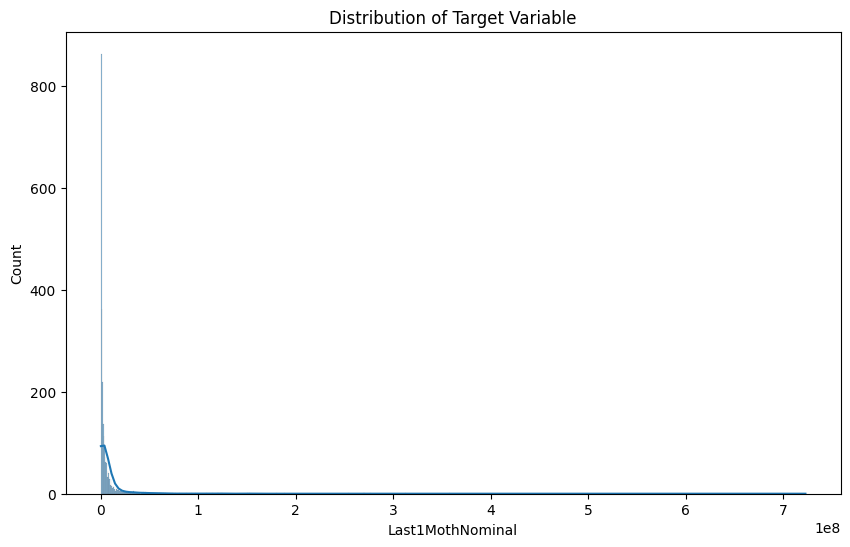

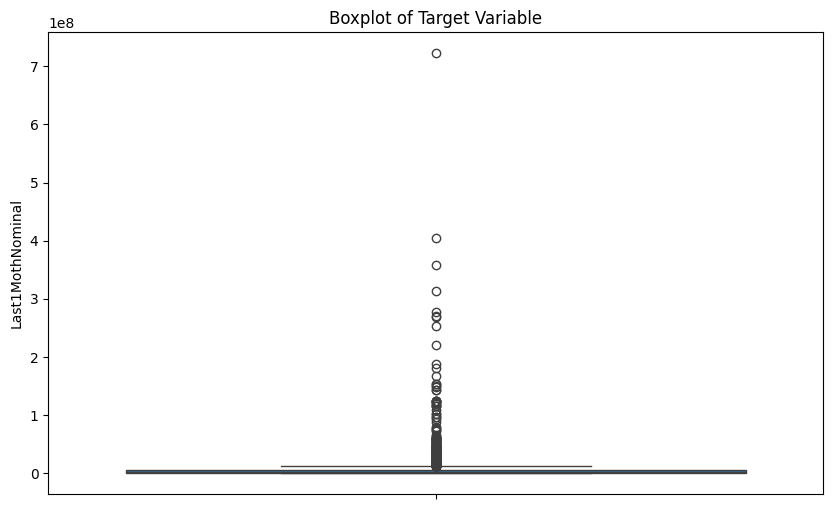

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y)
plt.title('Boxplot of Target Variable')
plt.show()

## Removing Outliers

In [136]:
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = np.where((Y < lower_bound) | (Y > upper_bound))[0]
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers}")

Lower bound: -6509500.0
Upper bound: 11958500.0
Number of outliers: 274
Indices of outliers: [   9   10   26   27   43   58   66   68  105  118  128  130  134  142
  148  153  188  194  198  206  210  226  236  239  256  286  294  301
  317  325  327  331  337  339  343  350  353  357  361  362  363  364
  387  395  407  417  428  447  471  472  479  488  490  491  494  507
  516  522  531  534  537  541  545  546  547  569  570  576  604  605
  606  615  620  623  654  659  679  682  683  704  708  727  739  740
  742  754  755  761  766  775  782  801  819  821  835  841  849  890
  904  922  951  954  956  980  981  984  990  998 1000 1002 1008 1039
 1046 1070 1089 1109 1121 1125 1126 1151 1152 1156 1159 1163 1170 1185
 1208 1209 1225 1229 1242 1246 1252 1255 1282 1288 1293 1299 1336 1350
 1376 1381 1383 1388 1389 1395 1398 1404 1409 1410 1423 1428 1437 1451
 1455 1459 1461 1469 1471 1478 1485 1502 1504 1508 1510 1511 1521 1530
 1535 1538 1550 1556 1573 1574 1580 1586 1593 1608 1611

In [137]:
Y_clean = Y[(Y >= lower_bound) & (Y <= upper_bound)]
X_clean = X[(Y >= lower_bound) & (Y <= upper_bound)]

print(f"Original dataset size: {len(Y)}")
print(f"Cleaned dataset size: {len(Y_clean)}")

Original dataset size: 2509
Cleaned dataset size: 2235


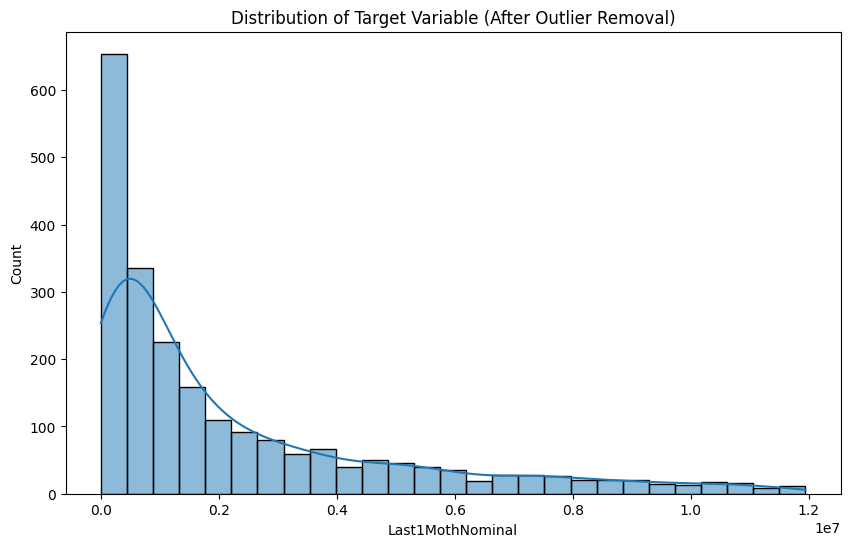

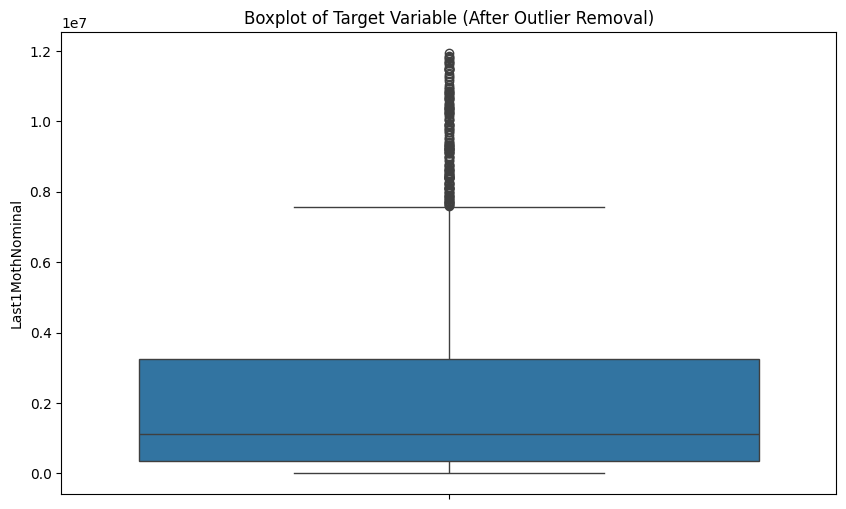

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(Y_clean, kde=True)
plt.title('Distribution of Target Variable (After Outlier Removal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y_clean)
plt.title('Boxplot of Target Variable (After Outlier Removal)')
plt.show()

## Scaling the Data

In [139]:
final_df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [140]:
testString ="4.000.000"
def remove_nth_character(string, n):
  return string[:n] + string[n+1:]

print(remove_nth_character(testString,5))

4.000000


In [142]:
label_df['review_rating'] = label_df["review_rating"].apply(lambda x: remove_nth_character(x,5))
label_df

C:\Users\pandu.prawira\AppData\Local\Temp\ipykernel_21112\2599907038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['review_rating'] = label_df["review_rating"].apply(lambda x: remove_nth_character(x,5))


,Unnamed: 0,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,0,15225,1772000,24,447000,4.000000,4
1,1,15318,6458500,41,2248000,4.400000,190
2,2,15325,930000,7,186000,4.900000,7
3,3,15325,1213000,5,630500,4.100000,33
4,4,15413,12818000,129,2630000,4.400000,14
...,...,...,...,...,...,...,...
2504,2504,15220,1088729,7,491000,5.000000,4
2505,2505,15228,1086891979,403,270673633,4.400000,343
2506,2506,15310,3465000,165,1816000,5.000000,1
2507,2507,15344,2687000,8,440000,4.600000,60


In [175]:
features = df.values
# target = label_df["Last1MothNominal"].values
target = label_df["Last1MothNominal"].values
# features_poly = poly.fit_transform(features)

In [181]:
print(features.shape)

(2360, 75)


In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.2)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Model Fitting

In [145]:
input_shape = X_train.shape[1:]
print(input_shape)

(75,)


## Dummy Regressor

In [146]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [147]:
predicted_target = dummy_regr.predict(X_test)

In [148]:
print(X_test.shape)

(502, 75)


In [149]:
list_data = X_test.tolist()

In [151]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_target))
rmse

23338415.881517638

## Lazy Predict

In [37]:
!pip uninstall lazypredict-nightly
# !pip install sklearn 1.3

^C


In [154]:
!pip install --force-reinstall -v "scikit-learn==1.3.2"

Using pip 24.1.2 from C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip (python 3.12)
  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Link requires a different Python (3.12.4 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/3a/be/650f9c091ef71cb01d735775d554e068752d3ff63d7943b26316dc401749/numpy-1.21.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.12.4 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/5f/d6/ad58ded26556eaeaa8c971e08b6466f17c4ac4d786cd3d800e26ce59cc01/numpy-1.21.3.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.12.4 not in: '>=3.7,<

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.2 which is incompatible.


In [155]:
import lazypredict

In [156]:
from lazypredict.Supervised import LazyRegressor

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

## Polynomial and Linear

In [137]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [276]:
from sklearn.linear_model import LinearRegression

In [241]:
# features_poly = poly.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [277]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [141]:
# test_features_poly = poly.fit_transform(X_test)

In [278]:
# predicted_target = model.predict(test_features_poly)
predicted_target = model.predict(X_test)

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_target))
rmse

45516096.90085684

In [281]:
for i in range(len(y_test)):
    print(str(i), ". Nilai Y_Train Aktual-Training: "+ str(y_test[i]), " - " + str(predicted_target[i]))
    if i == 5:
        break

0 . Nilai Y_Train Aktual-Training: 453000  - 1370064.5990685504
1 . Nilai Y_Train Aktual-Training: 1465000  - 2240982.874068111
2 . Nilai Y_Train Aktual-Training: 494000  - 4931196.845404595
3 . Nilai Y_Train Aktual-Training: 243000  - 7378662.640993603
4 . Nilai Y_Train Aktual-Training: 1220000  - 1745015.5618640967
5 . Nilai Y_Train Aktual-Training: 1508000  - 8326875.677024595


## Model Export

In [282]:
import pickle

In [283]:
pickle.dump(model,open( "model.pkl", "wb"))

In [284]:
# Load your existing model
with open('model.pkl', 'rb') as f:
    old_model = pickle.load(f)

# Create a new model with the correct input shape
new_model = LinearRegression()

# Fit the new model with dummy data to initialize its parameters
X_dummy = np.zeros((1, 75))  # One sample with 75 features
y_dummy = np.zeros(1)
new_model.fit(X_dummy, y_dummy)

# Copy the coefficients and intercept from the old model to the new one
new_model.coef_ = old_model.coef_[:75]  # Take only the first 75 coefficients
new_model.intercept_ = old_model.intercept_

# Verify the new model's expected input shape
print(f"New model expected input shape: {new_model.n_features_in_}")

# Save the new model
with open('model.pkl', 'wb') as f:
    pickle.dump(new_model, f)

New model expected input shape: 75


# Model Deployment

In [285]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [286]:
testShape = [19, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 53920, 26601, 27319, 46781, 4369, 1993, 105, 631, 41, 0, 9712, 4643, 4161, 5461, 17615, 208, 2295, 8815, 920, 90, 9965, 9387, 12358, 811, 21399, 3380, 4203, 4172, 3599, 4357, 4556, 4554, 4329, 4109, 3773, 3464, 3089, 2763, 1887, 1685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [287]:
instance = np.array(testShape)

In [288]:
print(f"Input shape: {instance.shape}")

Input shape: (75,)


In [289]:
print(f"Model expected input shape: {model.n_features_in_}")

Model expected input shape: 75


In [290]:
prediction = model.predict(instance.reshape(1, -1))
print(prediction.tolist())

[1040138.4595924541]


# Trash

Dari seluruh feature yang di-tes, terlihat bahwa feature 5,6,7 memiliki nilai f-test paling baik. F-test sendiri adalah test statistik yang menghitung rasio antara nilai-nilai variansi. Semakin besar nilai f-test suatu fitur, berarti semakin relevan fitur tersebut terhadap tujuan terkait.

Maka dapat diasumsikan bahwa feature 5,6,7 ('total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred')merupakan salah satu feature yang paling baik digunakan untuk memprediksi benua.

## Dimensionality Reduction

Selain feature selection menggunakan ANOVA yg sudah dipraktekkan di atas ataupun PCA yang kemaren dilakukan, sebenarnya tetap ada cara untuk mengurangi kembali feature feature yang akan digunakan dalam modelnya nanti. Salah satu di antaranya adalah Random Forests.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
from sklearn.ensemble import RandomForestRegressor

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df1['country'])

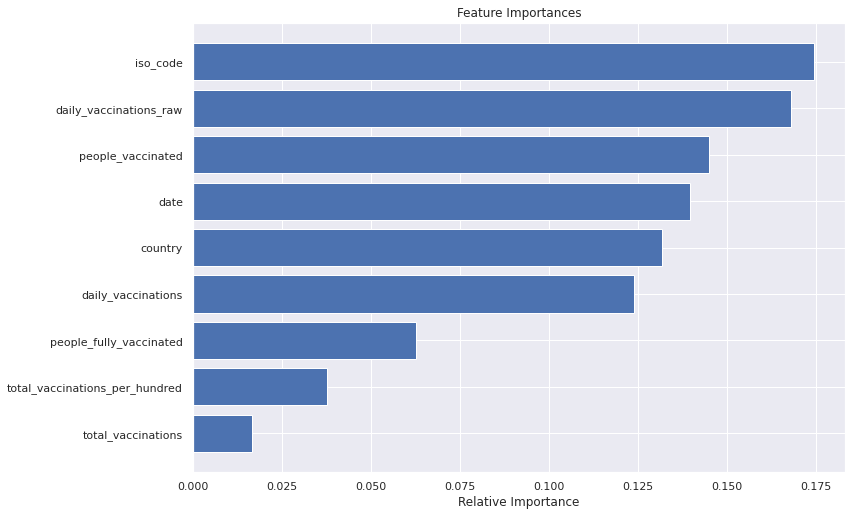

In [ ]:
x = df1[['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]


model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(x,y)
#y_coded = encoder.fit_transform(y)
features = df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)


Ini berarti untuk menentukan nilai kolom negara, maka fitur yang paling berpengaruh atau paling sesuai adalah ISO_Code (jelas,) daily_vaccinations_raw, dll.Fitur selain itu dapat direduksi/dikurangi secara perlahan.

Selain itu, ada juga cara yang dapat digunakan dengan mengkalkulasikan melewati filter Low Variance dan filter High Correlation. Cara melihat variansi dan korelasi adalah:


In [ ]:
df1.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_vaccinations                     5.185763e+16
people_vaccinated                      4.507151e+15
people_fully_vaccinated                2.581810e+15
daily_vaccinations_raw                 1.431252e+12
daily_vaccinations                     1.344754e+12
total_vaccinations_per_hundred         4.342409e+03
people_vaccinated_per_hundred          8.895894e+02
people_fully_vaccinated_per_hundred    8.164246e+02
daily_vaccinations_per_million         1.644898e+07
Rate_of_Growth                         1.942852e-03
year                                   1.373214e-01
month                                  1.247503e+01
day                                    7.777219e+01
dtype: float64

In [ ]:
df1.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Rate_of_Growth,year,month,day
total_vaccinations,1.000000,0.482090,0.526867,0.675914,0.708738,0.166869,-0.005702,0.002839,0.051754,-0.053725,0.091503,0.034282,-0.002491
people_vaccinated,0.482090,1.000000,0.855195,0.411242,0.431134,0.098384,0.149798,0.098735,0.042264,-0.056209,0.087826,0.045965,-0.000866
people_fully_vaccinated,0.526867,0.855195,1.000000,0.363198,0.378718,0.149703,0.155790,0.160533,0.038285,-0.061417,0.119794,0.037100,-0.000067
daily_vaccinations_raw,0.675914,0.411242,0.363198,1.000000,0.962854,0.047053,-0.050245,-0.061552,0.129190,-0.024654,-0.005930,0.042210,0.006475
daily_vaccinations,0.708738,0.431134,0.378718,0.962854,1.000000,0.051576,-0.050508,-0.062773,0.136963,-0.027365,-0.001274,0.044439,0.001825
total_vaccinations_per_hundred,0.166869,0.098384,0.149703,0.047053,0.051576,1.000000,0.873454,0.910372,0.245334,-0.324020,0.452234,0.177431,-0.003131
people_vaccinated_per_hundred,-0.005702,0.149798,0.155790,-0.050245,-0.050508,0.873454,1.000000,0.902236,0.310456,-0.319036,0.313700,0.245732,-0.002040
people_fully_vaccinated_per_hundred,0.002839,0.098735,0.160533,-0.061552,-0.062773,0.910372,0.902236,1.000000,0.173078,-0.308713,0.386662,0.220501,-0.002443
daily_vaccinations_per_million,0.051754,0.042264,0.038285,0.129190,0.136963,0.245334,0.310456,0.173078,1.000000,-0.027254,-0.059059,0.071179,0.014860
Rate_of_Growth,-0.053725,-0.056209,-0.061417,-0.024654,-0.027365,-0.324020,-0.319036,-0.308713,-0.027254,1.000000,-0.201654,-0.191176,0.015721


Dengan adanya pembatas/filter di nilai korelasi tinggi/variansi rendah tertentu, maka seluruh proses yang melibatkan keduanya susah diberi aman dan sepertinya tidak akan sukses.

## Penanganan Null Value

In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Melihat dari pendeskripsian kolom-kolom yang ada di dalam dataset di atas, dapat dilihat bahwa ada sekitar 9 kolom yang memiliki banyak nilai NaN atau Null. Maka dari itu perlu ditentukan penanganan bagi mereka bagaimana.

In [ ]:
df1.sample(axis='rows')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
81161,Yemen,YEM,2021-11-21,NaN,NaN,NaN,NaN,1926.0,NaN,NaN,NaN,63.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/


Penanganan pertama adalah dengan secara sederhana menghapus seluruh baris yang beratribut NaN

In [ ]:
df1_nonan = df1.dropna()

In [ ]:
df1_nonan

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
417,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
499,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
df1.loc[df1['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Afghanistan,AFG,2022-03-02,NaN,NaN,NaN,NaN,13825.0,NaN,NaN,NaN,347.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
374,Afghanistan,AFG,2022-03-03,NaN,NaN,NaN,NaN,12578.0,NaN,NaN,NaN,316.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
375,Afghanistan,AFG,2022-03-04,NaN,NaN,NaN,NaN,11332.0,NaN,NaN,NaN,284.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
376,Afghanistan,AFG,2022-03-05,NaN,NaN,NaN,NaN,10086.0,NaN,NaN,NaN,253.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df1_nonan[df1_nonan['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Tetapi seperti dapat dilihat di atas, hal ini akan menyebabkan banyaknya data yang terhapus dari suatu dataset. Maka dari itu perlu cara yang lebih efektif dalam menangani nilai NaN/Null dari dataset di atas.Langkah pertama yang akan diambil berdasar pada salah satu query di atas yaitu kolom 'daily_vaccinations'

In [ ]:
#Melihat karakteristik row dengan data 'daily_vaccinations' = 0.0
df1[(df1['daily_vaccinations'].isna())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
378,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
794,Algeria,DZA,2021-01-29,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1182,Algeria,DZA,2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1183,Algeria,DZA,2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80201,Wales,OWID_WLS,2021-01-10,86118.0,86039.0,79.0,NaN,NaN,2.72,2.71,0.0,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
80622,Wallis and Futuna,WLF,2021-03-23,1286.0,1286.0,NaN,NaN,NaN,11.59,11.59,NaN,NaN,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
80965,Yemen,YEM,2021-05-09,18555.0,18555.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
81267,Zambia,ZMB,2021-04-14,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


Berdasarkan query di atas, maka dapat dilihat bahwa row-row yang memiliki nilai 'daily_vaccinations' = NaN cenderung memiliki data NaN pula yang banyak di kolom-kolom lainnya. Dengan asumsi bahwa ini berarti data belum valid, maka data tersebut dapat di drop.

In [ ]:
df1_alt = df1.drop(df1[df1.daily_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Asumsi kedua yang akan digunakan adalah bahwa data total vaksinasi seharusnya selalu lengkap, karena ia merupakan data kumulatif dari seluruh data-data sebelumnya. Yang utamanya ingin dilihat dari dataset ini juga adalah data-data total_vaccinations yang terjadi, sehingga data dengan kolom 'total_vaccinations' == NaN tidak dapat dikalkulasikan pula. Maka dari itu, diasumsikan bahwa data dengan total_vaccinations == NaN adalah data yang korup.

In [ ]:
df1_alt = df1_alt.drop(df1_alt[df1_alt.total_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

Terakhir, dengan asumsi bahwa seluruh data yang sekarang diperhitungkan sudah valid, maka kita buat asumsi ketiga yaitu data-data dengan nilai NaN yang tersisa adalah data yang memang saat tercatat mereka tidak mengalami penambahan. Maka dari itu, nilai dari data dengan NaN yang tersisa adalah 0.

In [ ]:
df1_alt = df1_alt.fillna(0)

In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
#Mengganti dataset asli dengan dataset alternatif
df1 = df1_alt
df1.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Statistik Data

In [ ]:
df1.shape

(2999, 5)

In [ ]:
#Describing all numerical data
df1.describe()

,review_count,Last1MothNominal
count,2999.000000,2.999000e+03
mean,132.564188,7.832452e+06
std,521.055133,5.498988e+07
min,0.000000,2.000000e+03
25%,2.000000,3.587500e+05
50%,9.000000,1.220000e+06
75%,51.000000,4.176000e+06
max,11058.000000,1.994077e+09


In [ ]:
#Showing variance of all numerical data
df1.var()

TypeError: could not convert string to float: '-6.272.544'

In [ ]:
#Describing all data
df1.describe(include= 'all')

,review_count,review_rating,latitude,longitude,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal
count,2999.000000,2999,2999,2999,2999.000000,2.999000e+03,2999.000000,2.999000e+03
unique,NaN,33,2710,2714,NaN,NaN,NaN,NaN
top,NaN,5.000.000,-6.298.126,106.713.522,NaN,NaN,NaN,NaN
freq,NaN,743,8,8,NaN,NaN,NaN,NaN
mean,132.564188,NaN,NaN,NaN,330.018339,2.603235e+07,97.023341,7.832452e+06
std,521.055133,NaN,NaN,NaN,1067.788660,1.530137e+08,339.683365,5.498988e+07
min,0.000000,NaN,NaN,NaN,10.000000,4.678500e+04,1.000000,2.000000e+03
25%,2.000000,NaN,NaN,NaN,33.000000,1.407250e+06,9.000000,3.587500e+05
50%,9.000000,NaN,NaN,NaN,87.000000,4.451000e+06,25.000000,1.220000e+06
75%,51.000000,NaN,NaN,NaN,260.000000,1.540096e+07,72.000000,4.176000e+06


In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

review_count               0
review_rating              0
latitude                   0
longitude                  0
TotalTransaction           0
TotalNominalTransaction    0
Last1MonthTransaction      0
Last1MothNominal           0
dtype: int64

In [ ]:
#Calculating how many values are not null in each column
df1.count()

review_count               2999
review_rating              2999
latitude                   2999
longitude                  2999
TotalTransaction           2999
TotalNominalTransaction    2999
Last1MonthTransaction      2999
Last1MothNominal           2999
dtype: int64

In [ ]:
#Calculating correlation between each feature
df1.corr()

ValueError: could not convert string to float: '4.000.000'

In [ ]:
#Calculating covariance between each feature
df1.cov()

A positive and greater covariance number means a more direct relationship between two variables.

In [ ]:
#Calculating skewness of each feature
df1.skew()

A positive skew score means that the mean is greater than the median, which means that the data/column is imbalanced. The same thing works too for negative skew scores.

In [ ]:
#Calculating kurtosis of each feature
df1.kurt()

A high level of kurtosis means there is a high chance that the extreme points of a skewed data set would have a larger difference than its normal values.

In [ ]:
#List of all categorical columns
categoricals = df1.select_dtypes(include=['object']).columns.tolist()
#List of all numerical columns
numericals = df1.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Describe all categorical columns
for column in categoricals:
  print(df1[column].describe())

In [ ]:
df1.sample(5)

In [ ]:
#Verifikasi tipe data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_count             2999 non-null   int64 
 1   review_rating            2999 non-null   object
 2   latitude                 2999 non-null   object
 3   longitude                2999 non-null   object
 4   TotalTransaction         2999 non-null   int64 
 5   TotalNominalTransaction  2999 non-null   int64 
 6   Last1MonthTransaction    2999 non-null   int64 
 7   Last1MothNominal         2999 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 187.6+ KB
